<a href="https://www.kaggle.com/zeynel7/usa-state-distributing-the-most-vaccines?scriptVersionId=88484643" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

[California](#4) was the state that **distributed the most vaccines** in the past week.

[Vermont](#6) was the state that **distributed the most vaccines per 100 people** in the last week.


<font color = 'black'>

Content: 

* [Load Dataset](#1)
* [Preparing the Dataset](#2)
* [(A) List of Top 10 States that Distributed the most Vaccines in Total Last Week](#3)
    * [Result (A)](#4)
* [(B) List of the Top 10 States that Distributed the most Vaccines Per Capita](#5)
    * [Result (B)](#6) 


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns  
import os
import warnings
warnings.filterwarnings("ignore")
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/usa-covid19-vaccinations/us_state_vaccinations.csv


<a id = "1"></a><br>
# Load Dataset

In [2]:
Data = pd.read_csv('../input/usa-covid19-vaccinations/us_state_vaccinations.csv')
Data.head()

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used,total_boosters,total_boosters_per_hundred
0,2021-01-12,Alabama,78134.0,377025.0,70861.0,0.15,1.59,7270.0,1.45,7.69,NaN,NaN,NaN,0.207,NaN,NaN
1,2021-01-13,Alabama,84040.0,378975.0,74792.0,0.19,1.71,9245.0,1.53,7.73,5906.0,5906.0,1205.0,0.222,NaN,NaN
2,2021-01-14,Alabama,92300.0,435350.0,80480.0,NaN,1.88,NaN,1.64,8.88,8260.0,7083.0,1445.0,0.212,NaN,NaN
3,2021-01-15,Alabama,100567.0,444650.0,86956.0,0.28,2.05,13488.0,1.77,9.07,8267.0,7478.0,1525.0,0.226,NaN,NaN
4,2021-01-16,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7498.0,1529.0,NaN,NaN,NaN


In [3]:
type(Data)

pandas.core.frame.DataFrame

In [4]:
Data.columns

Index(['date', 'location', 'total_vaccinations', 'total_distributed',
       'people_vaccinated', 'people_fully_vaccinated_per_hundred',
       'total_vaccinations_per_hundred', 'people_fully_vaccinated',
       'people_vaccinated_per_hundred', 'distributed_per_hundred',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'daily_vaccinations_per_million', 'share_doses_used', 'total_boosters',
       'total_boosters_per_hundred'],
      dtype='object')

In [5]:
Data.location.unique()

array(['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas',
       'Bureau of Prisons', 'California', 'Colorado', 'Connecticut',
       'Delaware', 'Dept of Defense', 'District of Columbia',
       'Federated States of Micronesia', 'Florida', 'Georgia', 'Guam',
       'Hawaii', 'Idaho', 'Illinois', 'Indian Health Svc', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Long Term Care', 'Louisiana',
       'Maine', 'Marshall Islands', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York State', 'North Carolina', 'North Dakota',
       'Northern Mariana Islands', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Republic of Palau', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas',
       'United States', 'Utah', 'Vermont', 'Veterans Health',
       'Virgin Islands', 'Virginia', 'Washington', 'West V

<a id = "2"></a><br>
# Preparing the Dataset

In [6]:
# We will remove USA from the list because we want to see the STATES

Data1A = Data[Data.location != 'United States']

In [7]:
Data1A.fillna(0)

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used,total_boosters,total_boosters_per_hundred
0,2021-01-12,Alabama,78134.0,377025.0,70861.0,0.15,1.59,7270.0,1.45,7.69,0.0,0.0,0.0,0.207,0.0,0.00
1,2021-01-13,Alabama,84040.0,378975.0,74792.0,0.19,1.71,9245.0,1.53,7.73,5906.0,5906.0,1205.0,0.222,0.0,0.00
2,2021-01-14,Alabama,92300.0,435350.0,80480.0,0.00,1.88,0.0,1.64,8.88,8260.0,7083.0,1445.0,0.212,0.0,0.00
3,2021-01-15,Alabama,100567.0,444650.0,86956.0,0.28,2.05,13488.0,1.77,9.07,8267.0,7478.0,1525.0,0.226,0.0,0.00
4,2021-01-16,Alabama,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,7498.0,1529.0,0.000,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26143,2022-02-15,Wyoming,723234.0,921765.0,333970.0,50.27,124.96,290953.0,57.70,159.27,4.0,573.0,990.0,0.785,119692.0,20.68
26144,2022-02-16,Wyoming,724510.0,921865.0,334331.0,50.35,125.18,291386.0,57.77,159.28,1276.0,747.0,1291.0,0.786,120166.0,20.76
26145,2022-02-17,Wyoming,727461.0,926785.0,334602.0,50.39,125.69,291651.0,57.81,160.13,2951.0,848.0,1465.0,0.785,120416.0,20.81
26146,2022-02-18,Wyoming,727939.0,928785.0,334748.0,50.42,125.78,291827.0,57.84,160.48,478.0,788.0,1362.0,0.784,120600.0,20.84


<a id = "3"></a><br>
# (A)

* **List of the top 10 states that distributed the most vaccines total**

In [8]:
Data2A = Data1A[['date', 'location', 'total_distributed']]

In [9]:
Data3A = Data2A.pivot_table(index='date',columns=('location'),aggfunc=sum)

In [10]:
Data3A= Data3A.sort_values(by="date", ascending=False)
Data4A = Data3A.head(7)
Data4A

total_distributed                                                   \
location             Alabama     Alaska American Samoa     Arizona   Arkansas   
date                                                                            
2022-02-19         9207240.0  1430265.0        92810.0  13979320.0  5838520.0   
2022-02-18         9197040.0  1428665.0        92810.0  13962620.0  5833920.0   
2022-02-17         9180640.0  1424965.0        92810.0  13942520.0  5825920.0   
2022-02-16         9023700.0  1415905.0        92810.0  13782120.0  5698420.0   
2022-02-15         9017400.0  1414005.0        92810.0  13774820.0  5693520.0   
2022-02-14         9013800.0  1412105.0        92810.0  13768420.0  5691620.0   
2022-02-13         9013800.0  1412105.0        92810.0  13768420.0  5691620.0   

                                                                             \
location   Bureau of Prisons  California    Colorado Connecticut   Delaware   
date                                                                          
2022-02-19          329630.0  85497625.0  11800575.0   8265235.0  2211055.0   
2022-02-18          328630.0  85428825.0  11794175.0   8256135.0  2209655.0   
2022-02-17          326830.0  85267625.0  11784675.0   8235635.0  2199455.0   
2022-02-16          322910.0  84564025.0  11704835.0   8138515.0  2170135.0   
2022-02-15          321810.0  84513425.0  11696035.0   8131215.0  2168835.0   
2022-02-14          321310.0  84393225.0  11694535.0   8128515.0  2168135.0   
2022-02-13          321310.0  84393225.0  11694535.0   8128515.0  2168135.0   

            ...                                                    \
location    ...       Texas       Utah    Vermont Veterans Health   
date        ...                                                     
2022-02-19  ...  58558295.0  5957750.0  1689750.0       7773120.0   
2022-02-18  ...  58491095.0  5948350.0  1688550.0       7773120.0   
2022-02-17  ...  58400195.0  5939350.0  1687450.0       7773120.0   
2022-02-16  ...  57775435.0  5906950.0  1675710.0       7766420.0   
2022-02-15  ...  57727635.0  5902850.0  1675010.0       7766420.0   
2022-02-14  ...  57677735.0  5898450.0  1675010.0       7754020.0   
2022-02-13  ...  57677635.0  5898450.0  1675010.0       7754020.0   

                                                                             \
location   Virgin Islands    Virginia  Washington West Virginia   Wisconsin   
date                                                                          
2022-02-19       145360.0  18653105.0  16755495.0     3829685.0  11027045.0   
2022-02-18       145360.0  18634605.0  16745895.0     3826885.0  11016745.0   
2022-02-17       145360.0  18606405.0  16693695.0     3822985.0  11006845.0   
2022-02-16       145360.0  18430185.0  16552515.0     3783925.0  10921585.0   
2022-02-15       145360.0  18423685.0  16534715.0     3781625.0  10920385.0   
2022-02-14       145360.0  18406085.0  16533415.0     3780925.0  10895685.0   
2022-02-13       145360.0  18406085.0  16533415.0     3780925.0  10895685.0   

                      
location     Wyoming  
date                  
2022-02-19  928985.0  
2022-02-18  928785.0  
2022-02-17  926785.0  
2022-02-16  921865.0  
2022-02-15  921765.0  
2022-02-14  920865.0  
2022-02-13  920865.0  

[7 rows x 64 columns]

<a id = "4"></a><br>
**Top 10 states distributing the most vaccines**

In [11]:
Data4A = Data4A.sum(axis = 0, skipna = True)

Data5A = Data4A.sort_values(ascending=False)
Data6A = Data5A.head(10)
Data6A

                   location      
total_distributed  California        594057975.0
                   Texas             406308025.0
                   Florida           314816635.0
                   New York State    303153755.0
                   Pennsylvania      198761275.0
                   Ohio              151727345.0
                   New Jersey        144601785.0
                   North Carolina    144057800.0
                   Michigan          138076230.0
                   Virginia          129560155.0
dtype: float64

<a id = "5"></a><br>
# (B)

* **List of the Top 10 States that Distributed the most Vaccines Per Capita**

In [12]:
Data1B = Data.fillna(0)
Data2B = Data1B[['date', 'location', 'distributed_per_hundred']]
Data2B.tail(7)

,date,location,distributed_per_hundred
26141,2022-02-13,Wyoming,159.11
26142,2022-02-14,Wyoming,159.11
26143,2022-02-15,Wyoming,159.27
26144,2022-02-16,Wyoming,159.28
26145,2022-02-17,Wyoming,160.13
26146,2022-02-18,Wyoming,160.48
26147,2022-02-19,Wyoming,160.51


In [13]:
Data3B = Data2B.groupby(["date", "location"]).distributed_per_hundred.sum().reset_index()
Data3B = Data3B[Data3B.location != 'United States']
Data3B

,date,location,distributed_per_hundred
23,2021-01-12,Alabama,7.69
24,2021-01-12,Alaska,19.36
25,2021-01-12,American Samoa,19.12
26,2021-01-12,Arizona,7.74
27,2021-01-12,Arkansas,9.09
...,...,...,...
26143,2022-02-19,Virginia,218.54
26144,2022-02-19,Washington,220.04
26145,2022-02-19,West Virginia,213.69
26146,2022-02-19,Wisconsin,189.39


In [14]:
ddata3B = Data2B.pivot_table(values = 'distributed_per_hundred',index = ['date'], columns = 'location')
ddata3B

location,Alabama,Alaska,American Samoa,Arizona,Arkansas,Bureau of Prisons,California,Colorado,Connecticut,Delaware,...,United States,Utah,Vermont,Veterans Health,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
date,,,,,,,,,,,,,,,,,,,,,
2020-12-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-15,183.91,193.29,195.83,189.25,188.66,0.0,213.89,203.10,228.07,222.73,...,203.97,184.12,268.44,0.0,136.76,215.85,217.14,211.01,187.56,159.27
2022-02-16,184.04,193.55,195.83,189.35,188.83,0.0,214.02,203.25,228.27,222.86,...,204.15,184.25,268.55,0.0,136.76,215.92,217.37,211.14,187.58,159.28
2022-02-17,187.24,194.79,195.83,191.55,193.05,0.0,215.80,204.64,231.00,225.87,...,206.21,185.26,270.43,0.0,136.76,217.99,219.22,213.32,189.04,160.13


In [15]:
ddata4B = ddata3B.fillna(0) # Remove Nan Value
ddata4B

location,Alabama,Alaska,American Samoa,Arizona,Arkansas,Bureau of Prisons,California,Colorado,Connecticut,Delaware,...,United States,Utah,Vermont,Veterans Health,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
date,,,,,,,,,,,,,,,,,,,,,
2020-12-20,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
2020-12-21,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
2020-12-22,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
2020-12-23,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
2020-12-24,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-15,183.91,193.29,195.83,189.25,188.66,0.0,213.89,203.10,228.07,222.73,...,203.97,184.12,268.44,0.0,136.76,215.85,217.14,211.01,187.56,159.27
2022-02-16,184.04,193.55,195.83,189.35,188.83,0.0,214.02,203.25,228.27,222.86,...,204.15,184.25,268.55,0.0,136.76,215.92,217.37,211.14,187.58,159.28
2022-02-17,187.24,194.79,195.83,191.55,193.05,0.0,215.80,204.64,231.00,225.87,...,206.21,185.26,270.43,0.0,136.76,217.99,219.22,213.32,189.04,160.13


In [16]:
ddata4B= ddata4B.sort_values(by="date", ascending=False)
ddata5B = ddata4B.head(7)
ddata5B

location,Alabama,Alaska,American Samoa,Arizona,Arkansas,Bureau of Prisons,California,Colorado,Connecticut,Delaware,...,United States,Utah,Vermont,Veterans Health,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
date,,,,,,,,,,,,,,,,,,,,,
2022-02-19,187.78,195.51,195.83,192.06,193.47,0.0,216.38,204.92,231.83,227.06,...,206.77,185.83,270.80,0.0,136.76,218.54,220.04,213.69,189.39,160.51
2022-02-18,187.57,195.29,195.83,191.83,193.32,0.0,216.21,204.80,231.57,226.92,...,206.57,185.54,270.61,0.0,136.76,218.32,219.91,213.54,189.21,160.48
2022-02-17,187.24,194.79,195.83,191.55,193.05,0.0,215.80,204.64,231.00,225.87,...,206.21,185.26,270.43,0.0,136.76,217.99,219.22,213.32,189.04,160.13
2022-02-16,184.04,193.55,195.83,189.35,188.83,0.0,214.02,203.25,228.27,222.86,...,204.15,184.25,268.55,0.0,136.76,215.92,217.37,211.14,187.58,159.28
2022-02-15,183.91,193.29,195.83,189.25,188.66,0.0,213.89,203.10,228.07,222.73,...,203.97,184.12,268.44,0.0,136.76,215.85,217.14,211.01,187.56,159.27
2022-02-14,183.84,193.03,195.83,189.16,188.60,0.0,213.59,203.07,227.99,222.66,...,203.81,183.98,268.44,0.0,136.76,215.64,217.12,210.97,187.13,159.11
2022-02-13,183.84,193.03,195.83,189.16,188.60,0.0,213.59,203.07,227.99,222.66,...,203.81,183.98,268.44,0.0,136.76,215.64,217.12,210.97,187.13,159.11


In [17]:
ddata6B = ddata5B.sum(axis = 0) # Summing each column separately
print(ddata6B)

location
Alabama           1298.22
Alaska            1358.49
American Samoa    1370.81
Arizona           1332.36
Arkansas          1334.53
                   ...   
Virginia          1517.90
Washington        1527.92
West Virginia     1484.64
Wisconsin         1317.04
Wyoming           1117.89
Length: 65, dtype: float64


In [18]:
ddata6B = ddata6B.sort_values(ascending=False)
ddata7B = ddata6B.head(10)
ddata7B

location
Vermont                     1885.71
District of Columbia        1735.08
Maryland                    1716.83
New Hampshire               1657.71
Maine                       1641.94
Northern Mariana Islands    1634.71
Rhode Island                1630.02
New Jersey                  1627.99
Hawaii                      1624.26
Massachusetts               1622.46
dtype: float64

<a id = "6"></a><br>
* **As can be seen from the result above and the graph below, the state that distributed the most vaccines per 100 people in the last week**

Text(0, 0.5, 'Location')

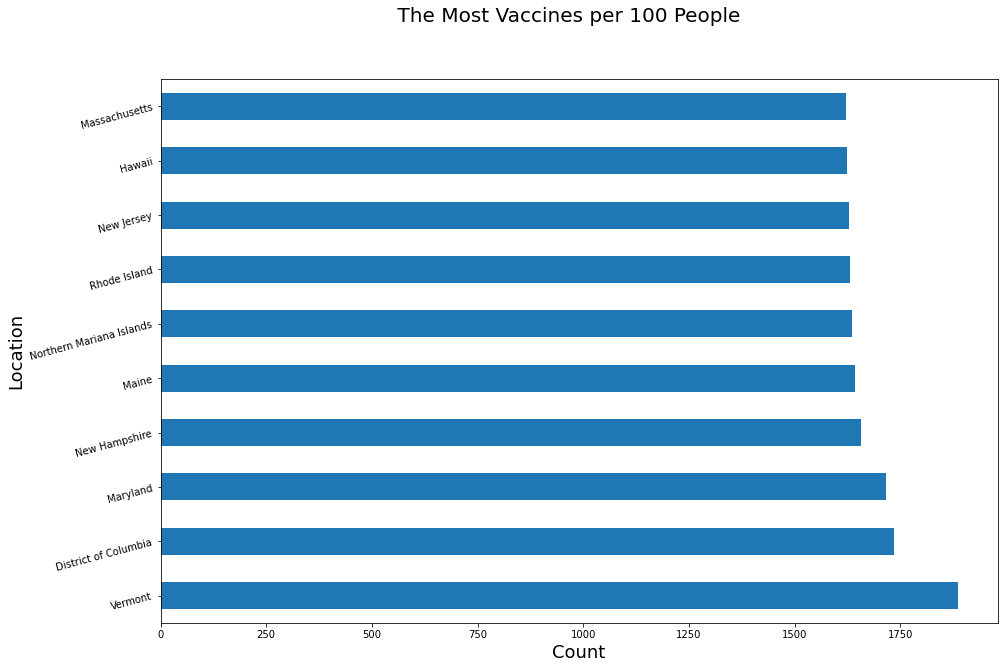

In [19]:
plt.figure(figsize=(15,10))
ddata7B.plot.barh(x='location', rot=15)
plt.suptitle(' The Most Vaccines per 100 People', fontsize=20)
plt.xlabel('Count', fontsize=18)
plt.ylabel('Location', fontsize=18)

*Thank you for your time*

**Thank you also for comment and upvote :)**